# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
from scipy import stats;
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean = 50, standard_deviation = 5 and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [2]:
# Variables
mu = 50;
sigma = 5;
sample_size = [10, 50, 500, 5000]

# Distributions & Tests
dists = [np.random.normal(mu, sigma, size) for size in sample_size]
tests = [stats.normaltest(dist) for dist in dists]

# Show tests
tests

/Users/Eva/anaconda2/envs/ironhack-3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


[NormaltestResult(statistic=2.618615127791457, pvalue=0.27000695423332566),
 NormaltestResult(statistic=1.0755393829592415, pvalue=0.5840494112199656),
 NormaltestResult(statistic=3.552670678042261, pvalue=0.16925728267421825),
 NormaltestResult(statistic=1.8617996909964436, pvalue=0.3941988326830078)]

#### Interpret the normaltest results and make your observations.

`Comments:`

This function tests the null hypothesis that a sample comes from a normal distribution 
assuming that all observations in each sample are independent and identically distributed. 

It first computes the skewness and kurtosis to quantify how far from normal the distribution 
is in terms of asymmetry and shape. So the higher the statistic, the more different to a normal 
distribution. 

It then calculates how far each of these values differs from the value expected with a 
Gaussian distribution, and computes a single p-value from the sum of these discrepancies. 

If the p-value is lower than the significance level, the null hypothesis can be rejected. 
If the p-value is greater than the significance level, we can't neither reject the null hypothesis nor accept it.

$H_0$: A sample comes from a normal distribution.<br/>
$H_a$: A sample does not comes from a normal distribution.

If the p-value is less than 0.05, we can reject the null hypothesis that a sample comes from a normal distribution with a confidence level of 95%. 

For the distributions generated, all of them pass the normal test.

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](images/ch-1.png)

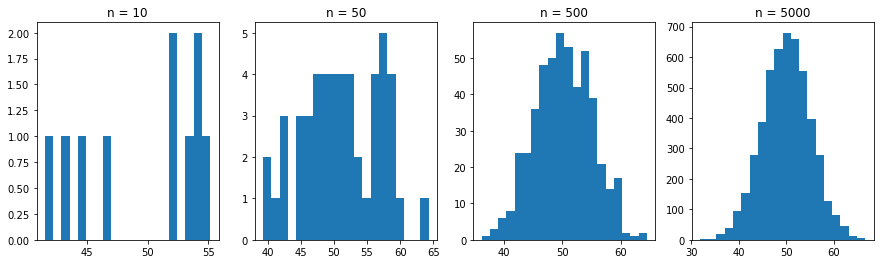

In [3]:
# Create figure and axes
f, ax = plt.subplots(1,4)
f.set_figwidth(15)

# Variables
bins = 20

# Plot each histogram
for x in range(4):
    ax[x].set_title('n = ' + str(sample_size[x]))
    ax[x].hist(dists[x], bins)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

`Comments:`

As the sample size increases, we see that the distritubtion more closely approximates a normal distribution 
around the mean, as is stated by the CLT.

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who watched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](images/ch-2.png)

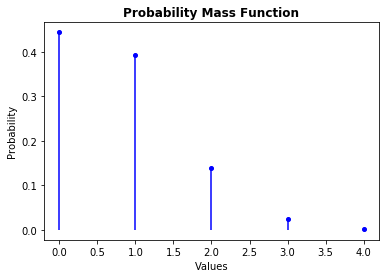

In [4]:
# Variables 
n = 5
p = 0.15
x = range(n)

# Binomial distribution
dist = stats.binom(n, p)

# Plot line + bullet point -> Discrete Distribution Representation
plt.plot(x, dist.pmf(x), 'bo', markersize=4)
plt.vlines(x, 0, dist.pmf(x), colors='b')
plt.title('Probability Mass Function', fontweight=700)
plt.xlabel('Values')
plt.ylabel('Probability')
plt.show()

#### Explain what you observe from the plot above.

`Comments:`

The plot shows the probability mass function for a discrete random variable.<br/>
We see there are only lines at whole numbers (discrete) and that the probability values sum to 1.

The plot also shows that the probability that a given number of people clicks an add decreases as the number of people that has to click increases. 

#### Now plot PMP with 50, 500, and 5000 visitors.

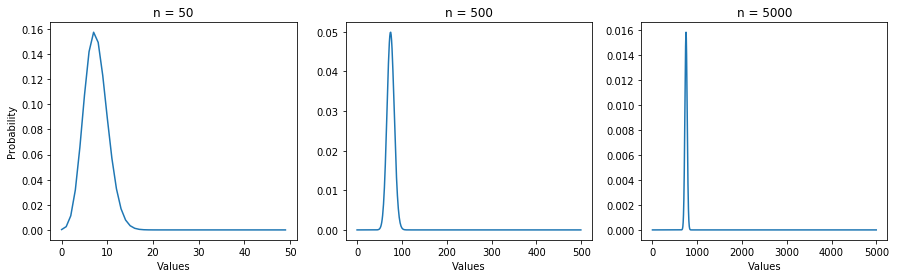

In [5]:
# Create figure and axes
f, ax = plt.subplots(1,3)
f.set_figwidth(15)

# Variables
sample_size = [50, 500, 5000]
p = 0.15

# Plot each PMF
# For visualization reasons, the next discrete distributions are represented using continuous lines
for i in range(3):
    x = range(sample_size[i])
    dist = stats.binom(sample_size[i], p)
    ax[i].set_title('n = ' + str(sample_size[i]))
    ax[i].plot(x, dist.pmf(x))
    ax[i].set_xlabel('Values')
ax[0].set_ylabel('Probability');

#### What did you notice from the distribution plots? Comment your findings.

`Comments:`
As the sample size increases, we see that the distribution changes. This is because the shape of the binomial distribution depends on the size of the group of people that clicked or not the YouTube ad.  

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

`Comments:`<br/>
The Poisson distribution is a discrete distribution function expressing probability of a given number of events occurring over a fixed interval of time or space.

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [6]:
# Variables
mu = 300
visits = 320

# Probability
stats.poisson.pmf(visits, mu)

0.011612348610402475

#### What is the probability of getting 60 visits?

In [7]:
# Variables
visits = 60

# Probability
stats.poisson.pmf(visits, mu)

2.622743762294515e-64

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](images/ch-3.png)

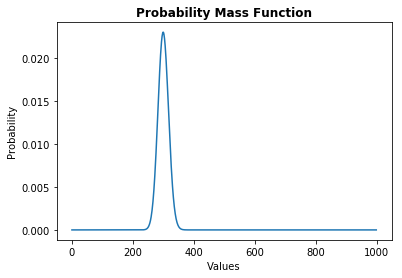

In [8]:
# Variables
visits = range(1000)

# Plot of the distribution
plt.plot(stats.poisson.pmf(visits, mu))
plt.title('Probability Mass Function', fontweight=700)
plt.xlabel('Values')
plt.ylabel('Probability');
plt.show()

# Challenge 4 - Central Limit Theorem
#### Example of application

A delivery company needs 35 minutes to deliver a package, with a standard deviation of 8 minutes. Suppose that in one day, they deliver 200 packages.

#### a. What is the probability that the mean delivery time today is between 30 and 35 minutes?

In [9]:
# Variables
mu = 35;
stdev = 8;
n_samples = 200;
sigma = stdev / np.sqrt(n_samples)

# Probability
p_3035 = stats.norm.cdf(35, mu, sigma) - stats.norm.cdf(30, mu, sigma)
p_3035

0.5

#### b. What is the probability that in total, it takes more than 115 hours to deliver all 200 packages?

In [10]:
# Variables
time = 115 * 60
time_x_package = time / n_samples

# Probability
1  - stats.norm.cdf(time_x_package, mu, sigma)

0.8116204410942089

# Challenge 5 - Normal Variables 

The value (in thousands) of the monthly sales of a publishing company follows a normal distribution with a mean equal to 200 and a standard deviation equal to 40. 

<div align="center">$X → N(200,40)$</div>

#### 1. Find the probability that the monthly sales are more than 300. 

In [11]:
# Variables
mu = 200
sigma = 40

# Probability
1 - stats.norm.cdf(300,200,40)

0.006209665325776159

#### 2. Find the probability that the monthly sales fall between 160 and 240.

In [12]:
# Probability
stats.norm.cdf(240,200,40) - stats.norm.cdf(160,200,40)

0.6826894921370859

#### 3. Find the probability that the monthly sales do not exceed 150.

In [13]:
# Probability
stats.norm.cdf(150,200,40)

0.10564977366685535

#### 4. Find the probability that the monthly sales exceed 3000. 

In [14]:
# Probability
1 - stats.norm.cdf(3000,200,40)

0.0

# Challenge 6 - Poisson distribution
The mean number of violent robberies per month that are registered in a particular barrio is 4. Find the following probabilities.
#### 1.The probability that in a particular month there is no violent robbery.

In [15]:
# Variables
mu = 4

# Probability
stats.poisson.cdf(0,mu)

0.018315638888734182

#### 2. The probability that there are at least 1 in a given month. 

In [16]:
# Probability
stats.poisson.cdf(1,mu)

0.0915781944436709

#### 3. The probability that there are between 2 and 6 (inclusive) in a given month.

In [17]:
# Probability
stats.poisson.cdf(6,mu) - stats.poisson.cdf(2,4)

0.6512227160438819

#### 4. The probability that there more than two in 15 days.  

In [18]:
# Probability
1 - stats.poisson.cdf(2,mu/2)

0.3233235838169366